In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
os.chdir("..")
print(os.getcwd())

c:\Users\valen\Desktop\etl_workshop002


In [3]:
lastfm_df = pd.read_csv("data/raw/lastfm_data.csv")
lastfm_df.head()

,artist_name,listeners,playcount,similar
0,!nvite,8030,19556,Bayleaf Manilla;Smiloh;Tentoe
1,#Kids,815,4431,Lullabies In Nature;Modern Children's Songs;Zo...
2,$affie,12512,32051,Ricki Wu;Lobby Lingu!n!;Exxecs
3,&ME,138173,1164546,Rampa;Adriatique;Adam Port
4,'Falsettos' 2016 Broadway Company,21687,487458,Anthony Rosenthal;Stephanie J. Block;Christian...


In [4]:
artists_df=pd.read_csv("data/raw/artists.csv")
needed_artists = artists_df['primary_artist'].tolist()  

In [5]:
found_artists = lastfm_df["artist_name"].unique()
missing = set(needed_artists) - set(found_artists)

print("Artists that do not yet appear after mapping:")
print(missing)

Artists that do not yet appear after mapping:
{'Clarence White', 'Clay Walker', 'The Kentucky Colonels', 'Maxida Märak', 'Phyno', 'Maxi Rozh', 'Maxel', 'Chrystian & Ralf', 'The Handsome Family', 'Dombresky', 'Maunalua', 'Maikel Delacalle', 'Reynaldo Santiago Chino ', 'Maxence Cyrin', 'Maximilian Sievert'}


In [6]:
len(missing)

15

In [7]:
lastfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  17632 non-null  object
 1   listeners    17632 non-null  int64 
 2   playcount    17632 non-null  int64 
 3   similar      17199 non-null  object
dtypes: int64(2), object(2)
memory usage: 551.1+ KB


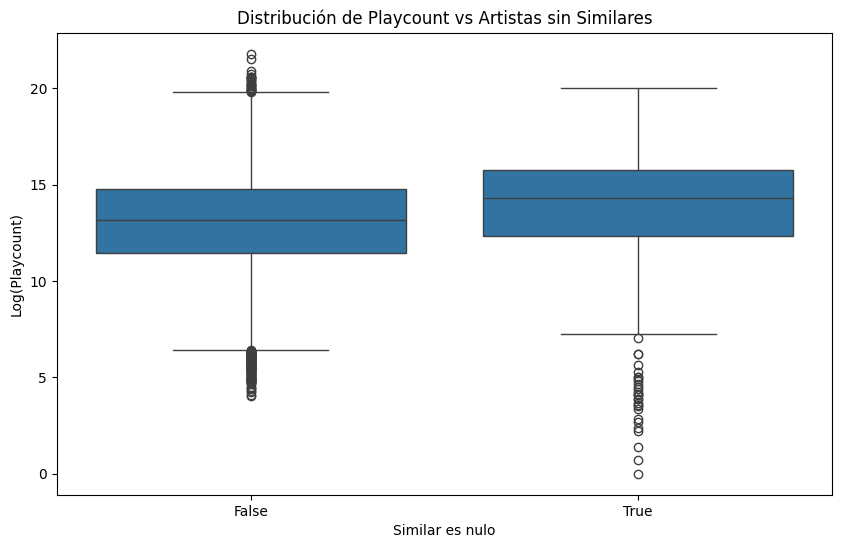

In [9]:
# Relación entre nulos y popularidad
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=lastfm_df['similar'].isnull(),
    y=np.log1p(lastfm_df['playcount'])  # Usar escala logarítmica
)
plt.title('Distribución de Playcount vs Artistas sin Similares')
plt.xlabel('Similar es nulo')
plt.ylabel('Log(Playcount)')
plt.show()

In [24]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='num_tags',
    y='listeners',
    data=lastfm_df[lastfm_df['num_tags'] <= 15],
    whis=[5, 95],  # Rango percentil
    palette="coolwarm"
)
sns.stripplot(
    x='num_tags',
    y='listeners',
    data=lastfm_df[lastfm_df['num_tags'] <= 15],
    color='black',
    alpha=0.3,
    size=3
)
plt.yscale('log')
plt.title('Distribución Estadística por Número de Tags')
plt.show()

KeyError: 'num_tags'

<Figure size 1400x700 with 0 Axes>